In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_style("darkgrid")
sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv("data/CATI_LPK_MASZK_2021_10_hullam_2021_10_compl_20211030_clean_Renyi.csv",
           sep=';',
           header=0)

# Fix data
df = df.replace("Kömlő", "Kömlőd")
df = df.replace("Hódosér (bakonyszentlászló)", "Bakonyszentlászló")

# Merge KSH
KSH = pd.read_csv("data/HU_places_admin_pop_ZIP_latlon.csv",
           sep=',',
           header=0)
df=pd.merge(df, KSH, left_on="K15A", right_on="place")

# Add central Hungary
pest = ["Budapest"]+["Alsónémedi","Biatorbágy","Budajenő","Budakalász","Budakeszi","Budaörs","Csobánka","Csomád","Csömör","Csörög","Dabas","Délegyháza","Diósd","Dunabogdány","Dunaharaszti","Dunakeszi","Dunavarsány","Ecser","Erdőkertes","Érd","Felsőpakony","Fót","Göd","Gödöllő","Gyál","Gyömrő","Halásztelek","Herceghalom","Inárcs","Isaszeg","Kakucs","Kerepes","Kistarcsa","Kisoroszi","Leányfalu","Majosháza","Maglód","Mogyoród","Monor","Nagykovácsi","Nagytarcsa","Ócsa","Őrbottyán","Páty","Perbál","Pécel","Pilisborosjenő","Piliscsaba","Pilisjászfalu","Pilisszántó","Pilisszentiván","Pilisszentkereszt","Pilisszentlászló","Pilisvörösvár","Pomáz","Pócsmegyer","Pusztazámor","Remeteszőlős","Solymár","Sóskút","Szada","Százhalombatta","Szentendre","Szigethalom","Szigetmonostor","Szigetszentmiklós","Sződ","Sződliget","Tahitótfalu","Taksony","Tárnok","Telki","Tinnye","Tök","Tököl","Törökbálint","Újhartyán","Újlengyel","Üllő","Üröm","Vác","Vácrátót","Vecsés","Veresegyház","Visegrád","Zsámbék"]
no_pest = [k for k in set(df["K15A"].array) if k not in pest]
pest = [k for k in set(df["K15A"].array) if k in pest]

centralHun = pd.DataFrame({
    "central":np.concatenate((np.ones(len(pest), dtype=int), np.zeros(len(no_pest), dtype=int))),
    "K15A":pest+no_pest
})
df=df.merge(centralHun, on="K15A")

In [3]:
from survey_plots import mysurvey, critsurvey

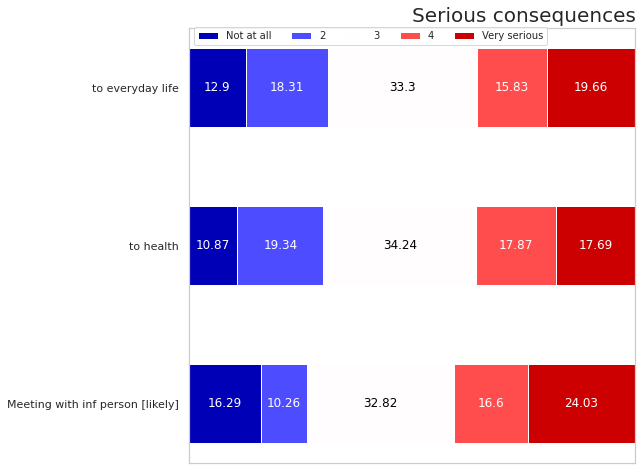

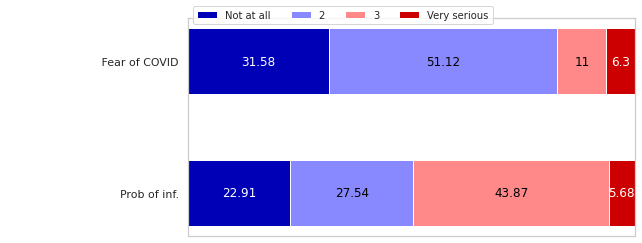

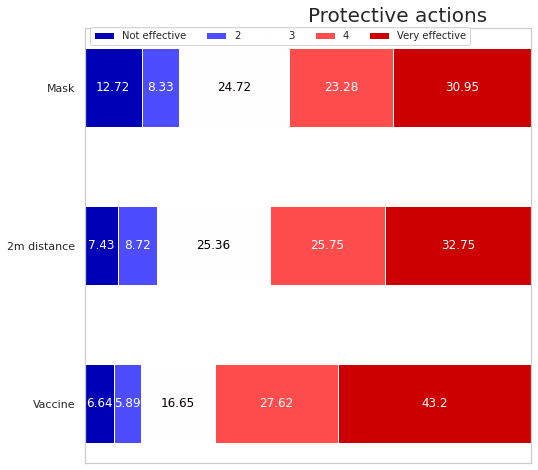

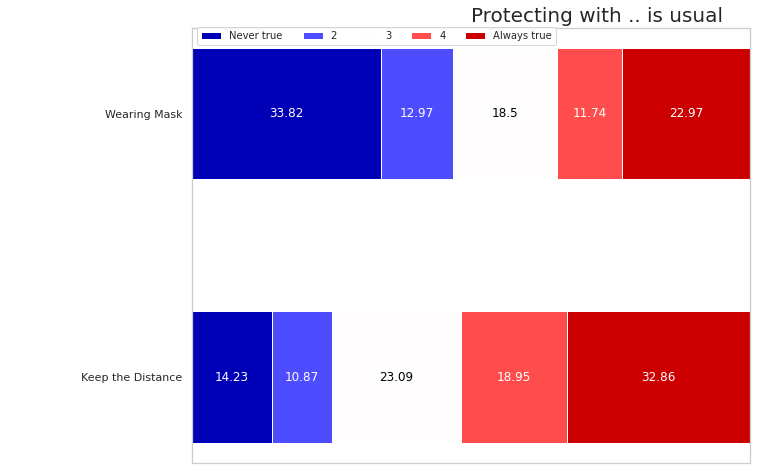

In [4]:
fig=mysurvey(df,
             ['K84', 'K85', 'K86'],
             ["to everyday life", "to health", "Meeting with inf person [likely]"],
             ["Not at all", "2", "3", "4", "Very serious"],figsize=(8,8))

plt.title("Serious consequences", fontsize=20, ha="left")
plt.show()

fig=mysurvey(df,
             [ 'K89', 'K90'],
             ["                           Fear of COVID", "Prob of inf."],
             ["Not at all", "2", "3", "Very serious"],figsize=(8,4))

#plt.title("Serious consequences", fontsize=20, ha="left")
plt.show()

fig=mysurvey(df,
             ['K87_01', 'K87_02', 'K87_03'],
             ["Mask", "2m distance", "Vaccine"],
             ["Not effective", "2", "3", "4", "Very effective"],figsize=(8,8))

plt.title("Protective actions", fontsize=20, ha="left")
plt.show()

fig=mysurvey(df,
             ['K88_01', 'K88_02'],
             ['                            Wearing Mask', 'Keep the Distance'],
             ["Never true", "2", "3", "4", "Always true"],figsize=(10,8))

plt.title("Protecting with .. is usual", fontsize=20, ha="left")
plt.show()

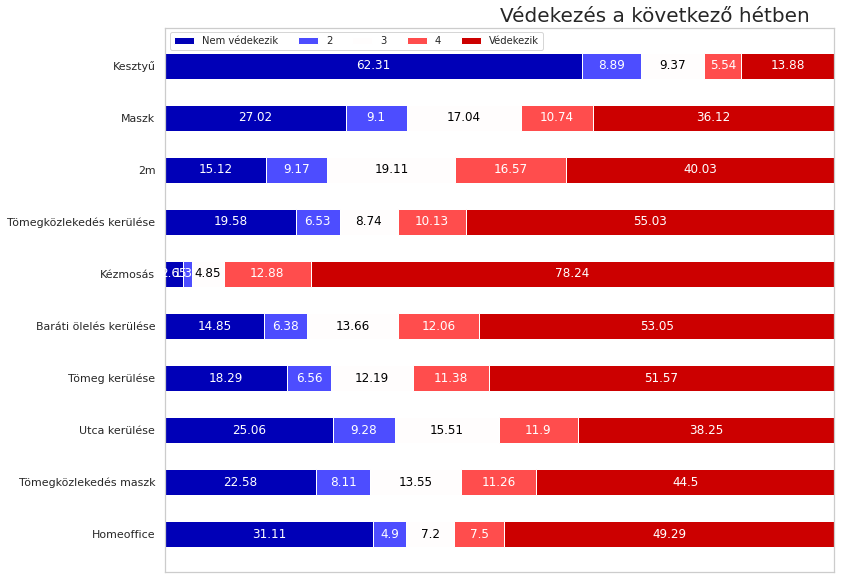

In [5]:
fig=mysurvey(df,
             ["K93_0{}".format(i) for i in range(1,10)]+["K93_11", "K93_12", "K93_13"],
             ['Kesztyű', 'Maszk', '2m', 'Tömegközlekedés kerülése', "Kézmosás", "Baráti ölelés kerülése", "Tömeg kerülése", "Utca kerülése", "Tömegközlekedés maszk", "Homeoffice"],
             ["Nem védekezik", "2", "3", "4", "Védekezik"],figsize=(12,10))

plt.title("Védekezés a következő hétben", fontsize=20, ha="left")
plt.show()

In [34]:
labels_bp = ["Budapest aggl.", "vidék"]
criterions_bp = [df["central"]==ctype for ctype in [1,0]]

age_arr = [(18,29), (30,44),(45, 60), (60,69), (70,79), (80,100)]
criterions_age = [(df["SZUL"]>=a) & (df["SZUL"]<=b) for a,b in age_arr]
labels_age = [f"Age ({a}-{b})" for (a,b),c in zip(age_arr, criterions_age)]

labels_oltott = ["nem oltott", "1 oltás", "2 oltás", "3 oltás"]
criterions_oltott = [df["K24"]==2, df["K25_1"]==1, df["K25_1"]==2, df["K25_1"]==3]

labels_cronic_illness = ["krónikus beteg", "nem kr. beteg"]
criterions_cronic_illness= [df["K8"]==1, df["K8"]==2]

labels_ill_friend = ["súlyos cov.", "nem súlyos cov."]
criterions_ill_friend = [df['K23_3']==1,df['K23_3']==2]

In [90]:
def survey_criterions(df, key, labels, criterions, category_names, figsize=(12,8)):
    results = {}
    for label,crit in zip(labels, criterions):
        x = df[crit].groupby([key])['súly'].sum()
        n = list(set(range(1,len(category_names)+1))-set(list(x.index)))
        x = x.append(pd.Series(np.zeros(len(n)), index=n))
        results[label+f" [#{len(df[crit])}]"]=np.round(100*x.array/np.sum(x.array), decimals=2)
        #print(label, results[label], x.index, x.array)
    survey(results, category_names, figsize)

# Consequences

* 1 olottak nagyon fircsán viselkednek. Lehet érdemes lenne leszűrni a Jansseneseket

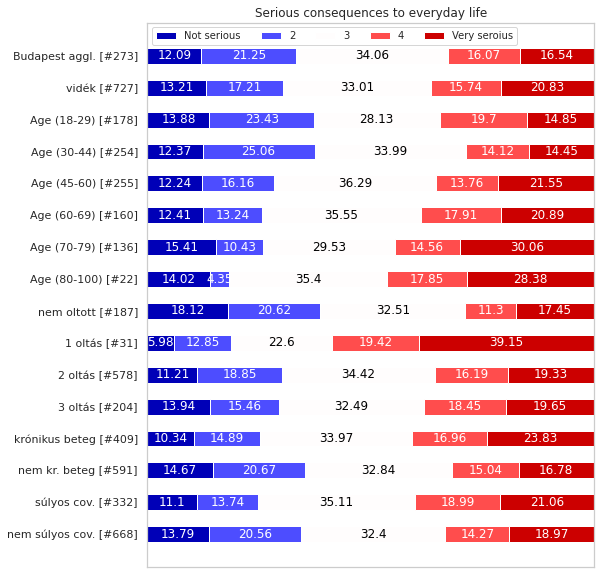

In [91]:
survey_criterions(df, "K84",
                  labels=labels_bp+labels_age+labels_oltott+labels_cronic_illness+labels_ill_friend,
                  criterions=criterions_bp+criterions_age+criterions_oltott+criterions_cronic_illness+criterions_ill_friend,
                  category_names= ["Not serious", "2", "3", "4", "Very seroius"],
                  figsize=(8,10))
plt.title("Serious consequences to everyday life")
plt.show()

Age80-100 -nál  összecsúszott a 4-5. kategória


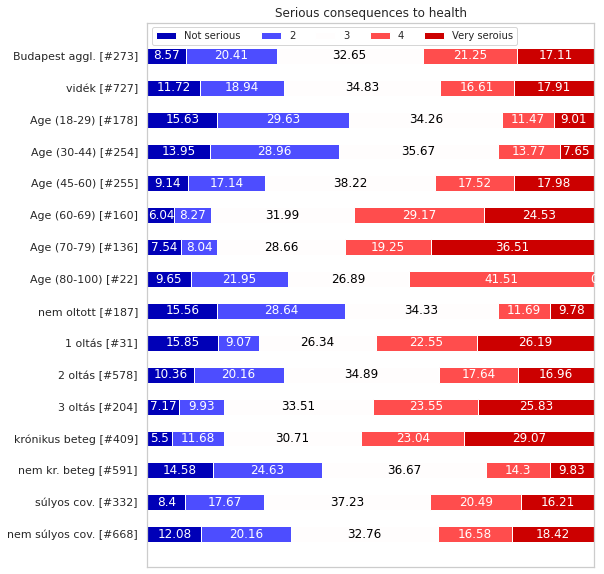

In [92]:
print("Age80-100 -nál  összecsúszott a 4-5. kategória")
survey_criterions(df, "K85",
                  labels=labels_bp+labels_age+labels_oltott+labels_cronic_illness+labels_ill_friend,
                  criterions=criterions_bp+criterions_age+criterions_oltott+criterions_cronic_illness+criterions_ill_friend,
                  category_names= ["Not serious", "2", "3", "4", "Very seroius"],
                  figsize=(8,10))
plt.title("Serious consequences to health")
plt.show()

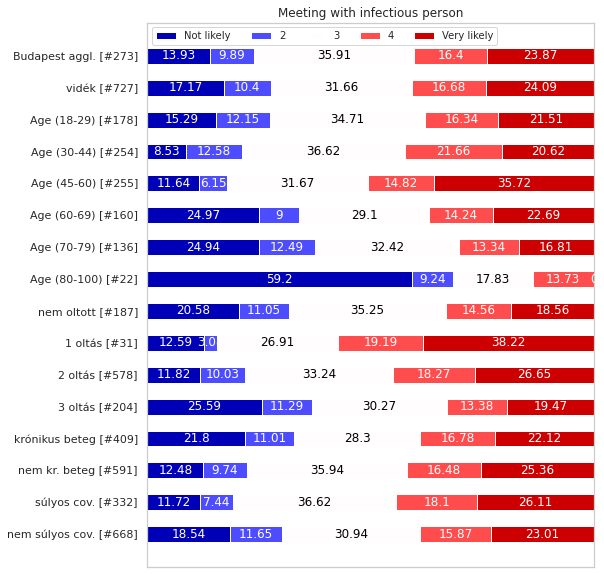

In [93]:
survey_criterions(df, "K86",
                  labels=labels_bp+labels_age+labels_oltott+labels_cronic_illness+labels_ill_friend,
                  criterions=criterions_bp+criterions_age+criterions_oltott+criterions_cronic_illness+criterions_ill_friend,
                  category_names= ["Not likely", "2", "3", "4", "Very likely"],
                  figsize=(8,10))
plt.title("Meeting with infectious person")
plt.show()

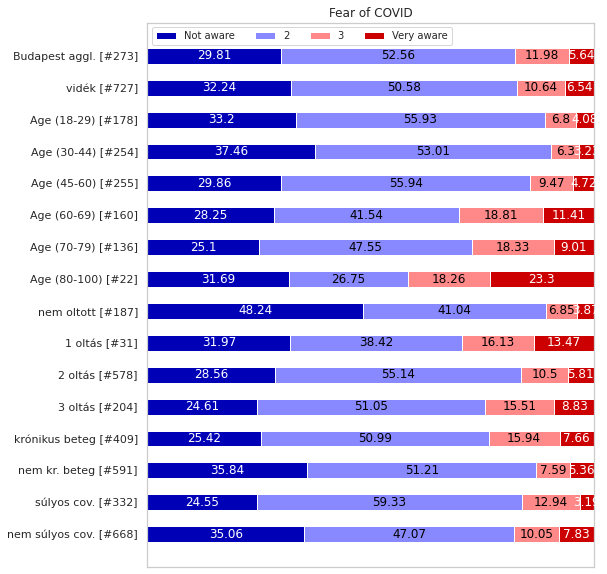

In [94]:
survey_criterions(df, "K89",
                  labels=labels_bp+labels_age+labels_oltott+labels_cronic_illness+labels_ill_friend,
                  criterions=criterions_bp+criterions_age+criterions_oltott+criterions_cronic_illness+criterions_ill_friend,
                  category_names= ["Not aware", "2", "3", "Very aware"],
                  figsize=(8,10))
plt.title("Fear of COVID")
plt.show()

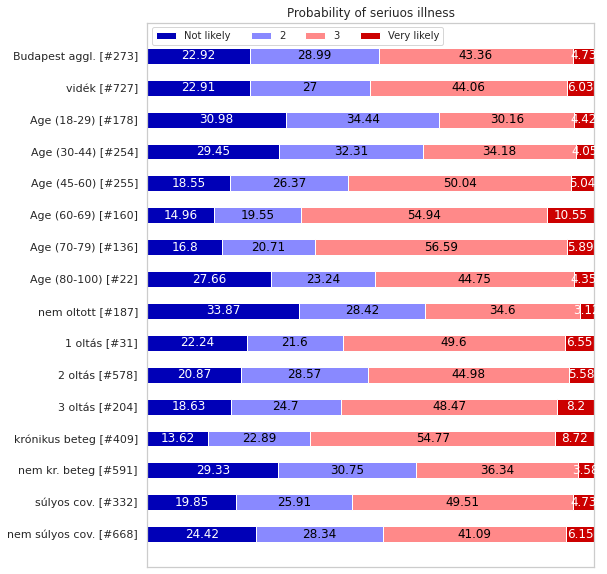

In [95]:
survey_criterions(df, "K90",
                  labels=labels_bp+labels_age+labels_oltott+labels_cronic_illness+labels_ill_friend,
                  criterions=criterions_bp+criterions_age+criterions_oltott+criterions_cronic_illness+criterions_ill_friend,
                  category_names= ["Not likely", "2", "3", "Very likely"],
                  figsize=(8,10))
plt.title("Probability of seriuos illness")
plt.show()

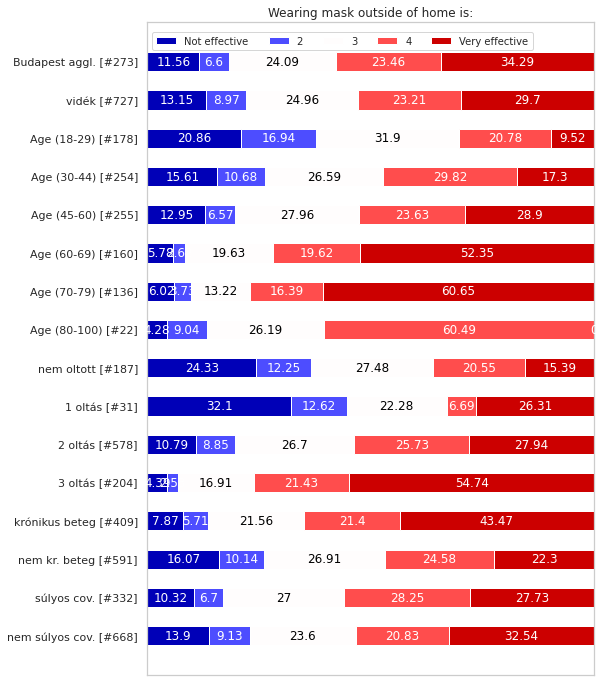

In [65]:
survey_criterions(df, "K87_01",
                  labels=labels_bp+labels_age+labels_oltott+labels_cronic_illness+labels_ill_friend,
                  criterions=criterions_bp+criterions_age+criterions_oltott+criterions_cronic_illness+criterions_ill_friend,
                  category_names= ["Not effective", "2", "3", "4", "Very effective"],
                  figsize=(8,12))
plt.title("Wearing mask outside of home is:")
plt.show()

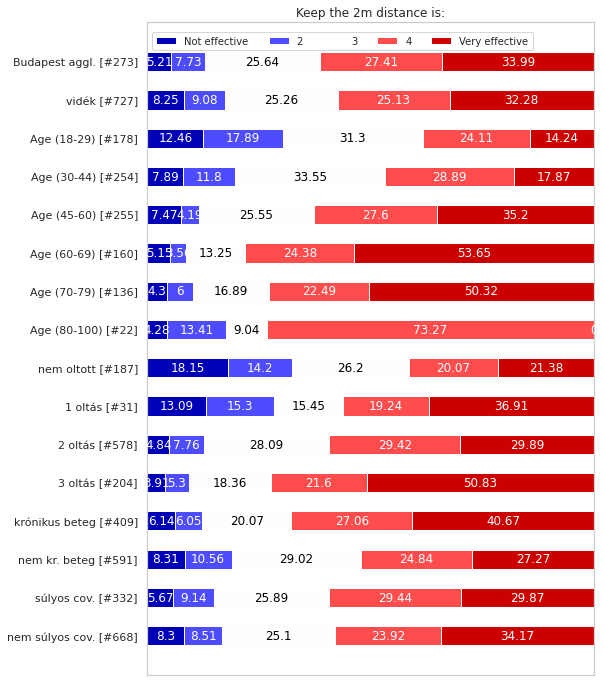

In [66]:
survey_criterions(df, "K87_02",
                  labels=labels_bp+labels_age+labels_oltott+labels_cronic_illness+labels_ill_friend,
                  criterions=criterions_bp+criterions_age+criterions_oltott+criterions_cronic_illness+criterions_ill_friend,
                  category_names= ["Not effective", "2", "3", "4", "Very effective"],
                  figsize=(8,12))
plt.title("Keep the 2m distance is:")
plt.show()

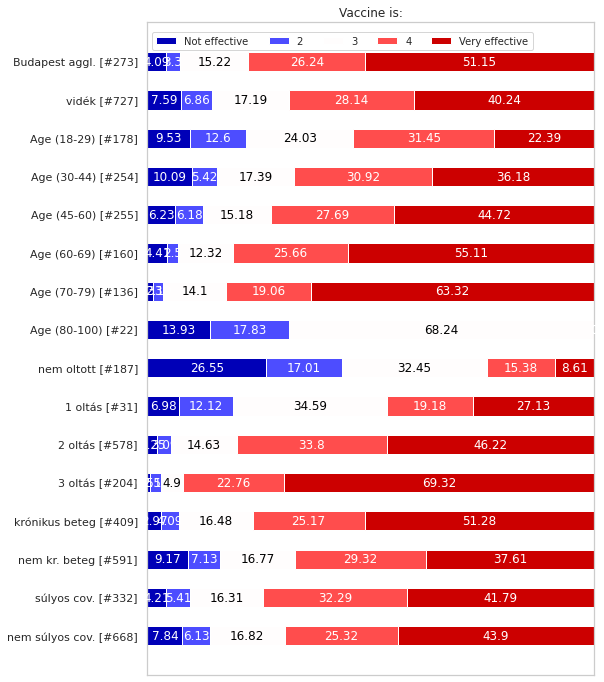

In [67]:
survey_criterions(df, "K87_03",
                  labels=labels_bp+labels_age+labels_oltott+labels_cronic_illness+labels_ill_friend,
                  criterions=criterions_bp+criterions_age+criterions_oltott+criterions_cronic_illness+criterions_ill_friend,
                  category_names= ["Not effective", "2", "3", "4", "Very effective"],
                  figsize=(8,12))
plt.title("Vaccine is:")
plt.show()

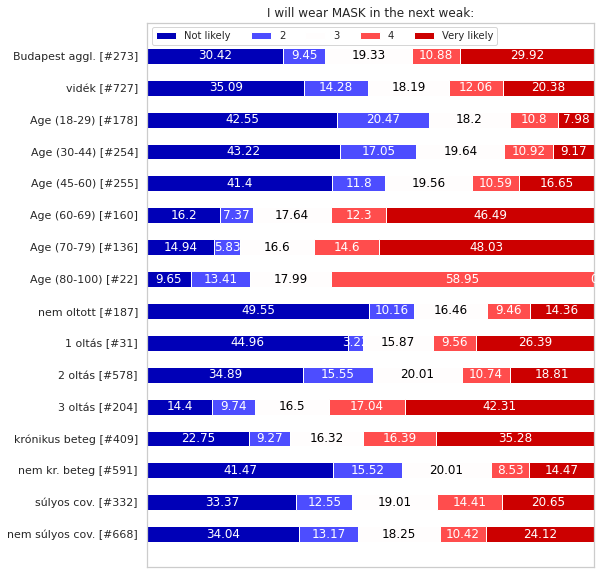

In [72]:
survey_criterions(df, "K88_01",
                  labels=labels_bp+labels_age+labels_oltott+labels_cronic_illness+labels_ill_friend,
                  criterions=criterions_bp+criterions_age+criterions_oltott+criterions_cronic_illness+criterions_ill_friend,
                  category_names= ["Not likely", "2", "3", "4", "Very likely"],
                  figsize=(8,10))
plt.title("I will wear MASK in the next weak:")
plt.show()

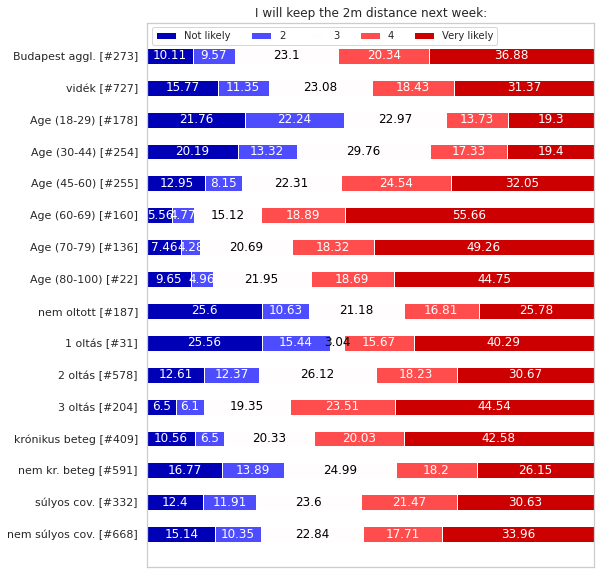

In [73]:
survey_criterions(df, "K88_02",
                  labels=labels_bp+labels_age+labels_oltott+labels_cronic_illness+labels_ill_friend,
                  criterions=criterions_bp+criterions_age+criterions_oltott+criterions_cronic_illness+criterions_ill_friend,
                  category_names= ["Not likely", "2", "3", "4", "Very likely"],
                  figsize=(8,10))
plt.title("I will keep the 2m distance next week:")
plt.show()